# Завдання 1: Зниження розмірності і візуалізація даних

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#https://www.kaggle.com/datasets/mssmartypants/water-quality
water = pd.read_csv('waterQuality.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
water

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.040,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.010,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.040,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.040,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.030,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.030,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.010,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.040,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.010,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.020,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


In [5]:
water = water.drop(labels=[7551,7568,7890],axis=0)

In [6]:
y = water['is_safe']

In [7]:
#good_features = ['aluminium']
data_water = water.drop(['is_safe'],axis=1)

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_water)

pca_result_df = pd.DataFrame({'water': pca_result[:,1], 'is_safe': pca_result[:,0], 'label': y})




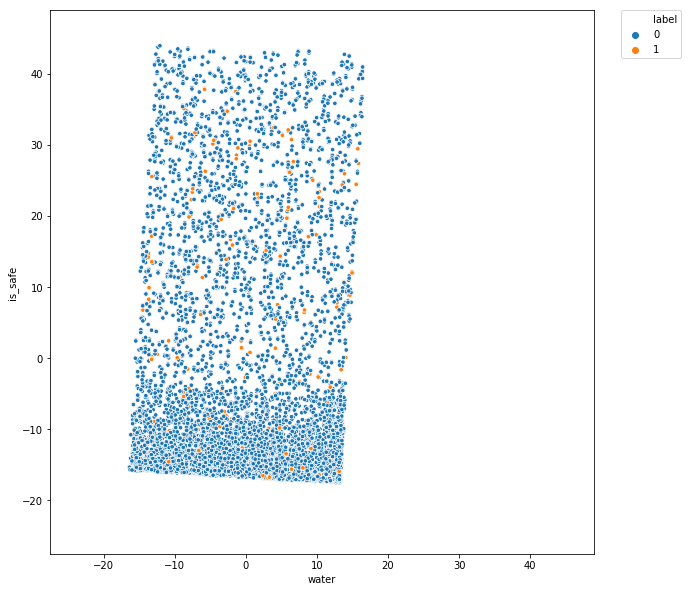

In [9]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10,10)
sns.scatterplot(x='water', y='is_safe', hue='label', data=pca_result_df, ax=ax,s=20)
lim = (pca_result.min()-10, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


In [10]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(data_water)

tsne_result_df = pd.DataFrame({'water': tsne_result[:,0], 'is_safe': tsne_result[:,1], 'label': y})


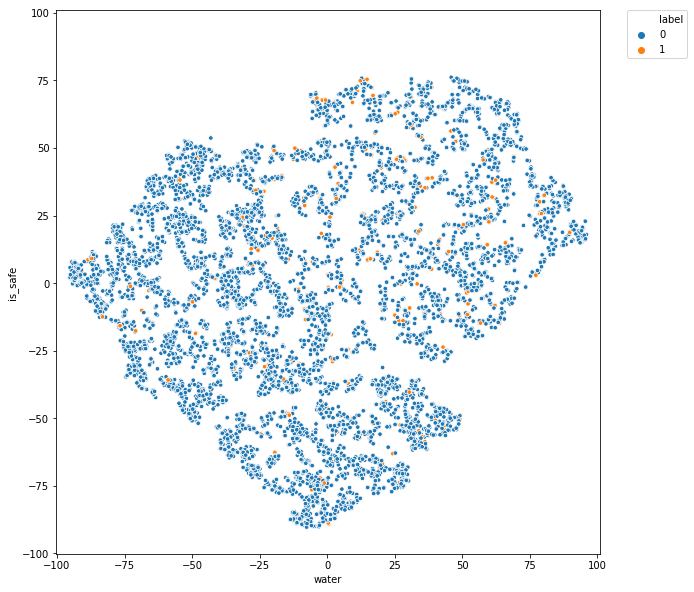

In [11]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10,10)
sns.scatterplot(x='water', y='is_safe', hue='label', data=tsne_result_df, ax=ax,s=20)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


# Завдання 2: Кластерний аналіз

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

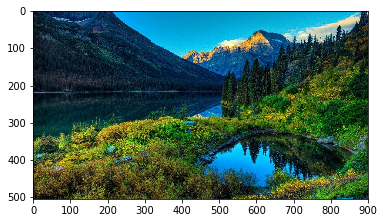

In [13]:
image = plt.imread('nature.jpg')
plt.imshow(image)

In [14]:
num_of_colors = [64, 32, 16, 8]

def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

image = np.array(image, dtype=np.float64) / 255

w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))



In [16]:
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

arr_kmeans = []
arr_labels = []

for i in range(len(num_of_colors)):
    arr_kmeans.append(KMeans(n_clusters=num_of_colors[i], random_state=0).fit(image_array_sample))
    arr_labels.append(arr_kmeans[i].predict(image_array)) 


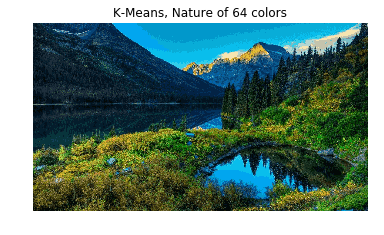

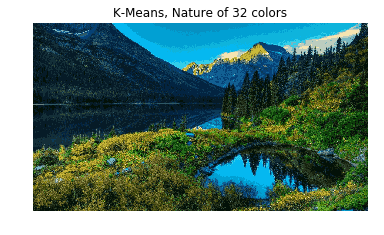

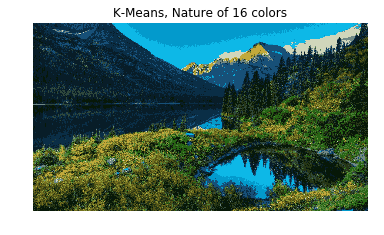

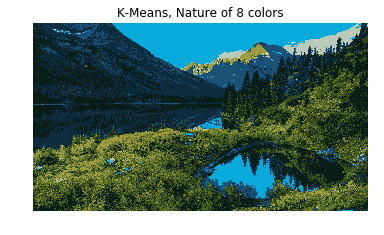

In [19]:

for i in range(len(num_of_colors)):
    plt.figure(i+1)
    plt.clf()
    plt.axis("off")
    plt.title("K-Means, Nature of " +str(num_of_colors[i]) + " colors")
    plt.imshow(recreate_image(arr_kmeans[i].cluster_centers_, arr_labels[i], w, h))

# Завдання 3: Обробка та класифікація текстових даних

Посилання на датасет:
https://www.kaggle.com/datasets/chandramoulinaidu/spam-classification-for-basic-nlp

In [20]:
import re
import string
import nltk
import wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from bs4 import BeautifulSoup


In [21]:
spam_dataset = pd.read_csv('text_spam.csv')
spam_dataset = spam_dataset.drop(['FILE_NAME'], axis = 1)
spam_dataset.shape

(5796, 2)

In [22]:
spam_dataset.head(15)

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...
5,1,------=_NextPart_000_00B8_51E06B6A.C8586B31\n\...
6,1,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon..."
7,1,<HR>\n\n<html>\n\n<head>\n\n <title>Secured I...
8,1,"<table width=""600"" border=""20"" align=""center"" ..."
9,1,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont..."


In [23]:
spam_dataset['CATEGORY'].value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

1 - Spam, 0 - Not spam

In [24]:
stop_words = stopwords.words("english")

In [25]:
def clean_text(text):
    #видалення html тегів з тексту
    soup = BeautifulSoup(text)
    text = soup.get_text()
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("http*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    #text = re.sub('\s[a-z]\s', " ", text)
    text = re.sub('\\b\\w{1,2}\\b', " ", text)
    odd_words = ['text','cdc','color','encoding','ffont','content','nbsp','2ffont','3darial','type','cfont','font','size','darial','list','charset','quoted','iso']
    for word in odd_words:
        text = re.sub('\s'+word+'\s', " ", text)
    text = re.sub('\s{2,}',' ', text)    
    return text


In [26]:
spam_dataset['MESSAGE'] = spam_dataset['MESSAGE'].apply(clean_text)
spam_dataset.head(15)

D:\Install\Anaconda\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


,CATEGORY,MESSAGE
0,1,dear homeowner interest rates lowest point yea...
1,1,attention must computer users new special pack...
2,1,multi part message mime format nextpart plain ...
3,1,important information new domain names finally...
4,1,bottom line give away free people like one mon...
5,1,nextpart plain transfer base sgvyzsdzihrozsbo...
6,1,navy hello chinese traditional × ¡ ¡ êà¼o×îó...
7,1,secured investements wealth without risk disc...
8,1,click simply amateur like girl next door xxx ...
9,1,answer unlist information message brought ans...


Spam


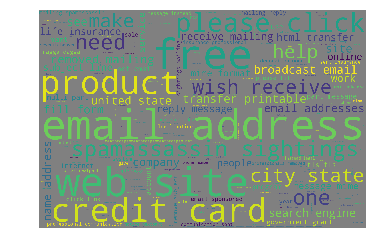

<Figure size 720x720 with 0 Axes>

Ham


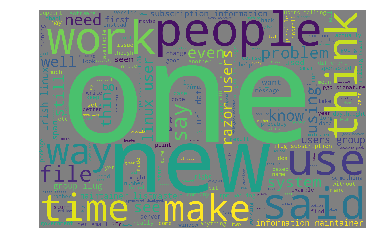

<Figure size 720x720 with 0 Axes>

In [29]:
def visualize(label):
    text = ''
    for msg in spam_dataset[spam_dataset['CATEGORY'] == label]['MESSAGE']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=1800, height=1200, background_color="grey").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.figure(figsize=(10,10))
    plt.show()
    
print('Spam')
visualize(1)
print('Ham')
visualize(0)

In [30]:
X = spam_dataset['MESSAGE']
y = spam_dataset['CATEGORY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
tfidfv = TfidfVectorizer()
X_train_vect = tfidfv.fit_transform(X_train)
X_test_vect = tfidfv.transform(X_test)

In [31]:
accuracy = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_vect,y_train)
    pred_i = knn.predict(X_test_vect)
    accuracy.append(accuracy_score(y_test,pred_i))
best = max(accuracy)    
print("Best value of K", accuracy.index(best)+1)
print("Accuracy:", best)

Best value of K 26
Accuracy: 0.9672413793103448


In [32]:
knn = KNeighborsClassifier(n_neighbors=accuracy.index(best)+1)

knn.fit(X_train_vect,y_train)
pred = knn.predict(X_test_vect)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))


[[728  32]
 [  6 394]]

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       760
           1       0.92      0.98      0.95       400

   micro avg       0.97      0.97      0.97      1160
   macro avg       0.96      0.97      0.96      1160
weighted avg       0.97      0.97      0.97      1160

0.9672413793103448
